In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import seaborn as sns

from scipy import sparse

from sklearn.metrics.pairwise import cosine_similarity


In [41]:
# Assuming you have a DataFrame named df with an index column
df = pd.read_csv('users-score-2023.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24325191 entries, 0 to 24325190
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   Username     object
 2   anime_id     int64 
 3   Anime Title  object
 4   rating       int64 
dtypes: int64(3), object(2)
memory usage: 927.9+ MB


In [42]:
df = df.drop(['Username'], axis=1)

In [43]:
threshold = 10000
df = df[df['user_id'] <= threshold]

# Reset the index of the DataFrame
df = df.reset_index(drop=True)

# Write the updated DataFrame to a new CSV file
df.to_csv('updated_userr_data.csv', index=False)

In [44]:
df = pd.read_csv('updated_userr_data.csv')
df

,user_id,anime_id,Anime Title,rating
0,1,21,One Piece,9
1,1,48,.hack//Sign,7
2,1,320,A Kite,5
3,1,49,Aa! Megami-sama!,8
4,1,304,Aa! Megami-sama! Movie,8
...,...,...,...,...
823431,9998,3588,Soul Eater,8
823432,9998,2001,Tengen Toppa Gurren Lagann,8
823433,9998,3859,Top Secret: The Revelation,8
823434,9998,3457,Vampire Knight,8


In [51]:
agg_ratings = df.groupby('Anime Title').agg(mean_rating = ('rating', 'mean'), number_of_ratings = ('rating', 'count')).reset_index()
agg_ratings_GT200 = agg_ratings[agg_ratings['number_of_ratings'] >= 200]
agg_ratings_GT200.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1027 entries, 24 to 11252
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anime Title        1027 non-null   object 
 1   mean_rating        1027 non-null   float64
 2   number_of_ratings  1027 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 32.1+ KB


In [52]:
agg_ratings_GT200.sort_values(by='number_of_ratings', ascending=False).head(10)

,Anime Title,mean_rating,number_of_ratings
2964,Fullmetal Alchemist,8.647763,3509
2142,Death Note,8.638561,3392
1246,Bleach,7.837107,3180
7001,Naruto,7.469111,2946
2684,Elfen Lied,8.087666,2635
1929,Cowboy Bebop,8.705350,2542
1855,Code Geass: Hangyaku no Lelouch,8.626382,2532
9577,Suzumiya Haruhi no Yuuutsu,8.544712,2449
8745,Sen to Chihiro no Kamikakushi,8.742640,2242
7649,Ouran Koukou Host Club,8.629864,2210


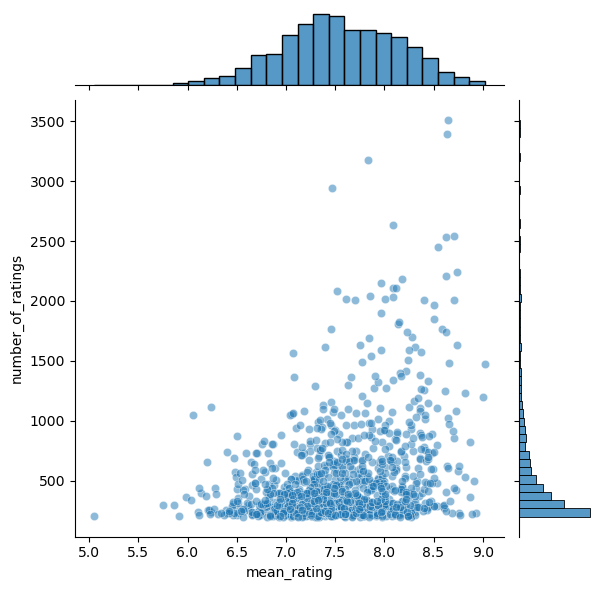

In [53]:
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT200, alpha=0.5)

In [54]:
df_GT200 =pd.merge(df, agg_ratings_GT200, how='inner')

In [56]:
df_GT200.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538184 entries, 0 to 538183
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            538184 non-null  int64  
 1   anime_id           538184 non-null  int64  
 2   Anime Title        538184 non-null  object 
 3   rating             538184 non-null  int64  
 4   mean_rating        538184 non-null  float64
 5   number_of_ratings  538184 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 24.6+ MB


In [89]:
print('The rating dataset has', df_GT200['user_id'].nunique(), 'unique users.')
print('The rating dataset has', df_GT200['anime_id'].nunique(), 'unique animes.')
# List of unique ratings
print('The unique ratings are', sorted(df_GT200['rating'].unique()))

The rating dataset has 6447 unique users.
The rating dataset has 1027 unique animes.
The unique ratings are [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [58]:
matrix = df_GT200.pivot_table(index='user_id', columns='Anime Title', values='rating')
matrix.head()

Anime Title,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,.hack//Unison,07-Ghost,11eyes,3-gatsu no Lion,...,Zoids,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,ef: A Tale of Melodies.,ef: A Tale of Memories.,s.CRY.ed,xxxHOLiC,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC◆Kei
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
4,NaN,NaN,NaN,6.0,NaN,5.0,NaN,7.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# Normalize user-item matrix

# Since some people may tend to always give high or low ratings, we normalize the ratings by using each user's mean rating
# This is done by subtracting the mean rating of each user from each rating given by that user
# After normalization, the animes with a rating less than the user's average rating will have a negative value 
# and the animes with a rating greater than the user's average rating will have a positive value

matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm.head()

Anime Title,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,.hack//Unison,07-Ghost,11eyes,3-gatsu no Lion,...,Zoids,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,ef: A Tale of Melodies.,ef: A Tale of Memories.,s.CRY.ed,xxxHOLiC,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC◆Kei
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,-0.681818,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.681818,NaN,NaN,NaN
4,NaN,NaN,NaN,-1.183007,NaN,-2.183007,NaN,-0.183007,-2.183007,NaN,...,NaN,NaN,NaN,NaN,NaN,0.816993,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.736264,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:

# Pearson Correlation
# Caculate similarity between each pair of users
user_similarity = matrix_norm.T.corr()
user_similarity.head()

user_id,1,4,9,20,23,37,47,48,53,66,...,9984,9985,9987,9988,9991,9992,9994,9995,9996,9998
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.274116,0.374805,0.528717,0.004395,0.340156,0.120085,0.325994,-0.116262,0.060044,...,0.286385,0.468293,-0.544949,0.433781,0.355595,-0.065412,0.277638,NaN,-0.284995,0.367517
4,0.274116,1.000000,0.041758,0.140035,-0.008433,0.440632,0.303680,0.441150,0.366618,0.402764,...,0.336418,NaN,1.000000,-0.048876,0.066750,-0.293225,0.268955,1.0,0.583333,0.338444
9,0.374805,0.041758,1.000000,0.240728,0.068665,0.253143,0.189851,-0.060987,-0.009012,0.266594,...,0.132584,-0.866025,0.000000,0.120418,0.549435,0.358901,-0.069920,NaN,-0.449089,0.021926
20,0.528717,0.140035,0.240728,1.000000,0.228579,0.449013,0.475951,0.523500,0.518875,-0.048393,...,0.376064,0.716115,-0.620365,0.524096,0.166726,0.169276,0.272174,NaN,NaN,0.397906
23,0.004395,-0.008433,0.068665,0.228579,1.000000,0.335030,0.157802,0.157892,-0.279372,-0.103869,...,0.000201,0.944911,-0.132453,-0.067267,0.349246,-0.357639,0.106115,NaN,0.989743,0.171767


In [79]:
picked_userid = 4

user_similarity.drop(picked_userid, inplace=True)

user_similarity.head()

user_id,1,4,9,20,23,37,47,48,53,66,...,9984,9985,9987,9988,9991,9992,9994,9995,9996,9998
user_id,,,,,,,,,,,,,,,,,,,,,
9,0.374805,0.041758,1.000000,0.240728,0.068665,0.253143,0.189851,-0.060987,-0.009012,0.266594,...,0.132584,-0.866025,0.000000,0.120418,0.549435,0.358901,-6.991976e-02,NaN,-0.449089,0.021926
20,0.528717,0.140035,0.240728,1.000000,0.228579,0.449013,0.475951,0.523500,0.518875,-0.048393,...,0.376064,0.716115,-0.620365,0.524096,0.166726,0.169276,2.721737e-01,NaN,NaN,0.397906
23,0.004395,-0.008433,0.068665,0.228579,1.000000,0.335030,0.157802,0.157892,-0.279372,-0.103869,...,0.000201,0.944911,-0.132453,-0.067267,0.349246,-0.357639,1.061150e-01,NaN,0.989743,0.171767
37,0.340156,0.440632,0.253143,0.449013,0.335030,1.000000,0.334666,0.359921,-0.624038,0.305254,...,-0.086692,0.327327,NaN,-0.099340,0.488273,-0.582459,6.839048e-17,NaN,0.080845,-0.092406
47,0.120085,0.303680,0.189851,0.475951,0.157802,0.334666,1.000000,0.465650,0.035707,0.206892,...,0.283222,0.408248,-0.628971,0.276686,0.269741,0.236089,3.747317e-01,NaN,-0.168297,-0.014302


In [80]:
# Number of similar users
n = 10

# User similarity threashold
user_similarity_threshold = 0.3

# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 4 are user_id
9813    1.0
8286    1.0
5407    1.0
4288    1.0
6959    1.0
4319    1.0
9792    1.0
4358    1.0
6894    1.0
6885    1.0
Name: 4, dtype: float64


In [81]:
# Movies that the target user has watched
picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_watched

Anime Title,.hack//Roots,.hack//Tasogare no Udewa Densetsu,07-Ghost,11eyes,A-Channel,Aa! Megami-sama!,Accel World,Air,Aishiteruze Baby★★,Ajin,...,Jigoku Shoujo,Junjou Romantica,Junjou Romantica 2,Juuni Kokuki,K,K-On!,K-On!: Live House!,Kage kara Mamoru!,Kaichou wa Maid-sama!,ef: A Tale of Memories.
user_id,,,,,,,,,,,,,,,,,,,,,
4,-1.183007,-2.183007,-0.183007,-2.183007,-1.183007,-1.183007,-0.183007,0.816993,-0.183007,-0.183007,...,-0.183007,-1.183007,-1.183007,1.816993,-2.183007,-0.183007,-0.183007,-1.183007,1.816993,0.816993


In [82]:
# Movies that similar users watched. Remove movies that none of the similar users have watched
similar_user_animes = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_animes

Anime Title,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,Aa! Megami-sama!,Aa! Megami-sama! (TV),Air Gear,Azumanga Daiou The Animation,Bishoujo Senshi Sailor Moon,Bishoujo Senshi Sailor Moon R,Bishoujo Senshi Sailor Moon S,...,Trigun,Tsubasa Chronicle,Tsubasa Chronicle 2nd Season,Vampire Hunter D,Vampire Hunter D (2000),Wolf's Rain,X/1999,Yumeria,Zero no Tsukaima,Zero no Tsukaima: Futatsuki no Kishi
user_id,,,,,,,,,,,,,,,,,,,,,
4288,-0.214286,0.785714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.166667,0.166667,NaN,NaN,NaN,NaN,NaN
4358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5407,NaN,NaN,NaN,NaN,NaN,-1.580645,2.419355,-0.580645,0.419355,2.419355,...,-0.580645,NaN,NaN,NaN,NaN,NaN,0.419355,NaN,NaN,NaN
6885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-2.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
6894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.5,-1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6959,0.333333,NaN,-0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9792,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# Remove the watched movie from the movie list
similar_user_animes.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')

# Take a look at the data
similar_user_animes

Anime Title,.hack//Sign,Aa! Megami-sama! (TV),Air Gear,Azumanga Daiou The Animation,Bishoujo Senshi Sailor Moon,Bishoujo Senshi Sailor Moon R,Bishoujo Senshi Sailor Moon S,Bleach,Blood: The Last Vampire,Boogiepop wa Warawanai,...,Trigun,Tsubasa Chronicle,Tsubasa Chronicle 2nd Season,Vampire Hunter D,Vampire Hunter D (2000),Wolf's Rain,X/1999,Yumeria,Zero no Tsukaima,Zero no Tsukaima: Futatsuki no Kishi
user_id,,,,,,,,,,,,,,,,,,,,,
4288,0.785714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.166667,NaN,...,NaN,NaN,NaN,0.166667,0.166667,NaN,NaN,NaN,NaN,NaN
4358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5407,NaN,NaN,-1.580645,2.419355,-0.580645,0.419355,2.419355,-2.580645,NaN,2.419355,...,-0.580645,NaN,NaN,NaN,NaN,NaN,0.419355,NaN,NaN,NaN
6885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-2.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
6894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.5,-1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.142857,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9792,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_animes.columns:
  # Get the ratings for movie i
  anime_rating = similar_user_animes[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the movie has rating
    if pd.isna(anime_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the movie rating
      score = similar_users[u] * anime_rating[u]
      # Add the score to the total score for the movie so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['anime', 'anime_score'])
    
# Sort the movies by score
ranked_item_score = item_score.sort_values(by='anime_score', ascending=False)

# Select top m movies
m = 10
ranked_item_score.head(m)

,anime,anime_score
3,Azumanga Daiou The Animation,2.419355
6,Bishoujo Senshi Sailor Moon S,2.419355
68,Rurouni Kenshin: Meiji Kenkaku Romantan - Seis...,2.419355
9,Boogiepop wa Warawanai,2.419355
26,Gravitation,2.000000
61,Ouran Koukou Host Club,2.000000
45,Kino no Tabi: The Beautiful World,1.785714
49,Lucky☆Star,1.500000
67,Rurouni Kenshin: Meiji Kenkaku Romantan,1.419355
69,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,1.419355


In [85]:
# Average rating for the picked user
avg_rating = matrix[matrix.index == picked_userid].T.mean()[picked_userid]

# Print the average movie rating for user 1
print(f'The average movie rating for user {picked_userid} is {avg_rating:.2f}')

The average movie rating for user 4 is 7.18


In [86]:
# Calcuate the predicted rating
ranked_item_score['predicted_rating'] = ranked_item_score['anime_score'] + avg_rating

# Take a look at the data
ranked_item_score.head(m)

,anime,anime_score,predicted_rating
3,Azumanga Daiou The Animation,2.419355,9.602361
6,Bishoujo Senshi Sailor Moon S,2.419355,9.602361
68,Rurouni Kenshin: Meiji Kenkaku Romantan - Seis...,2.419355,9.602361
9,Boogiepop wa Warawanai,2.419355,9.602361
26,Gravitation,2.000000,9.183007
61,Ouran Koukou Host Club,2.000000,9.183007
45,Kino no Tabi: The Beautiful World,1.785714,8.968721
49,Lucky☆Star,1.500000,8.683007
67,Rurouni Kenshin: Meiji Kenkaku Romantan,1.419355,8.602361
69,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,1.419355,8.602361


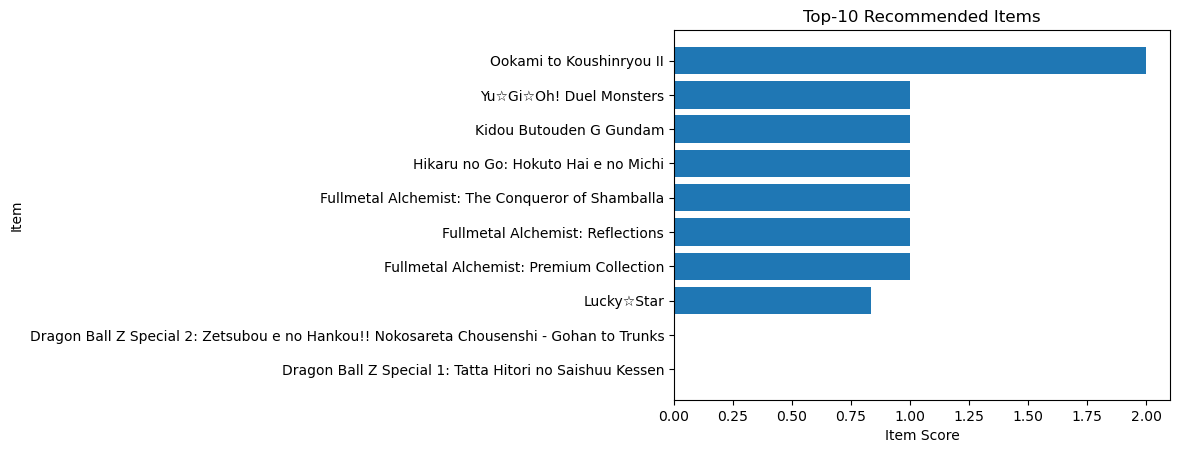

In [77]:
top_N = ranked_item_score.head(10)

plt.barh(top_N['anime'], top_N['anime_score'])
plt.title('Top-10 Recommended Items')
plt.xlabel('Item Score')
plt.ylabel('Item')
plt.gca().invert_yaxis()  # Invert y-axis to display the top item at the top
plt.show()

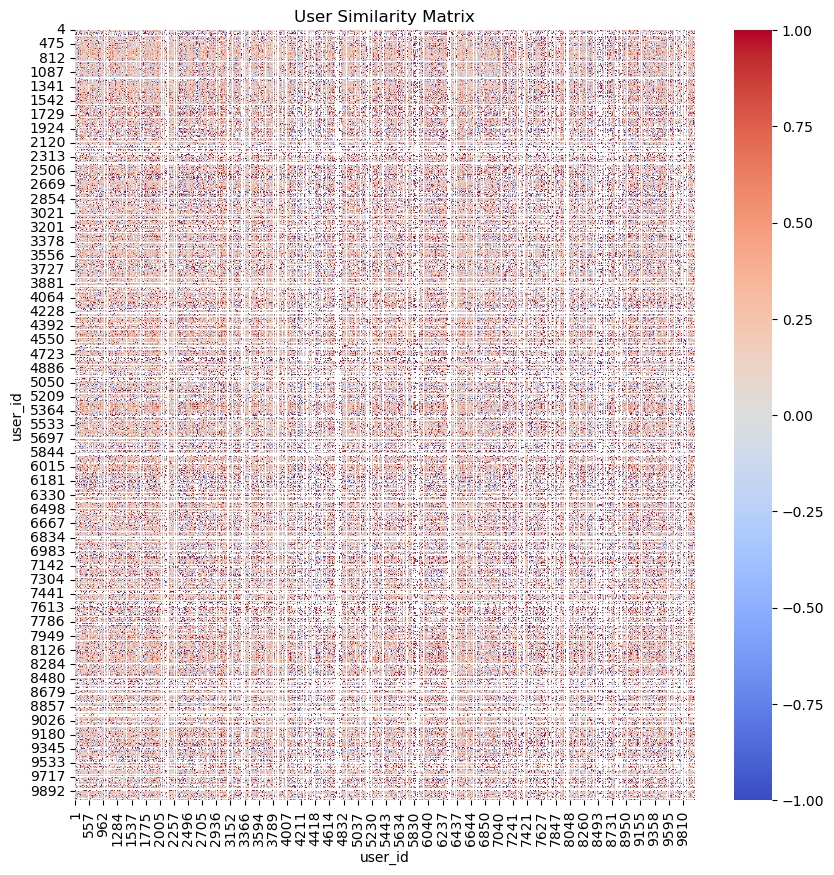

In [78]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(user_similarity, cmap='coolwarm', center=0)
plt.title('User Similarity Matrix')
plt.show()

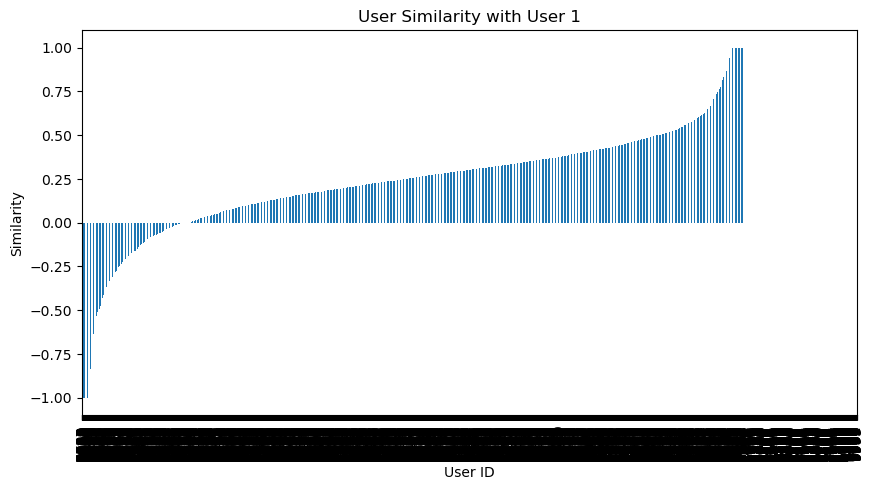

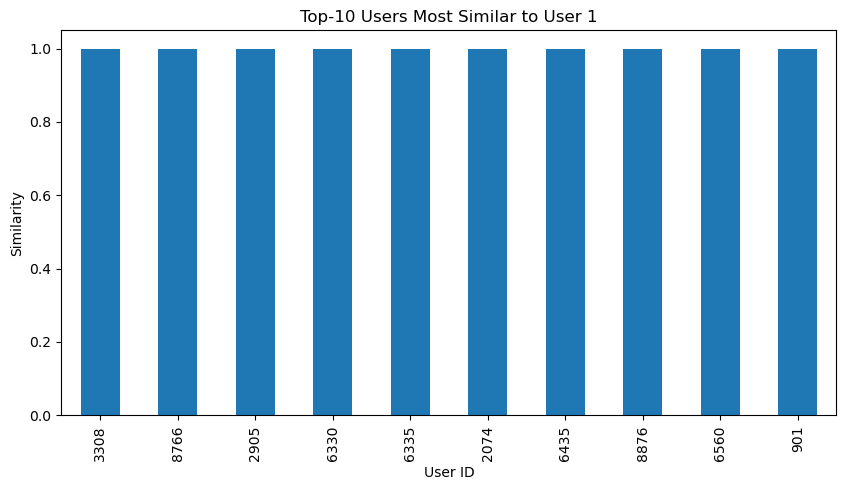

In [88]:
# Assuming `user_similarity` is your user similarity DataFrame
user_similarity_1 = user_similarity[1]  # Replace with the ID of the user you're interested in

plt.figure(figsize=(10, 5))
user_similarity_1.sort_values().plot(kind='bar')
plt.title('User Similarity with User 1')
plt.xlabel('User ID')
plt.ylabel('Similarity')
plt.show()

N = 10  # Number of users to display

plt.figure(figsize=(10, 5))
user_similarity_1.sort_values(ascending=False).head(N).plot(kind='bar')
plt.title(f'Top-{N} Users Most Similar to User 1')
plt.xlabel('User ID')
plt.ylabel('Similarity')
plt.show()
